# Introduction to TF2.4_IVIM-MRI_CodeCollection github and IVIM Analysis using Python

# Installation

First, download the TF2.4_IVIM-MRI_CodeCollection github as zip-folder by clicking on Code > Download ZIP:

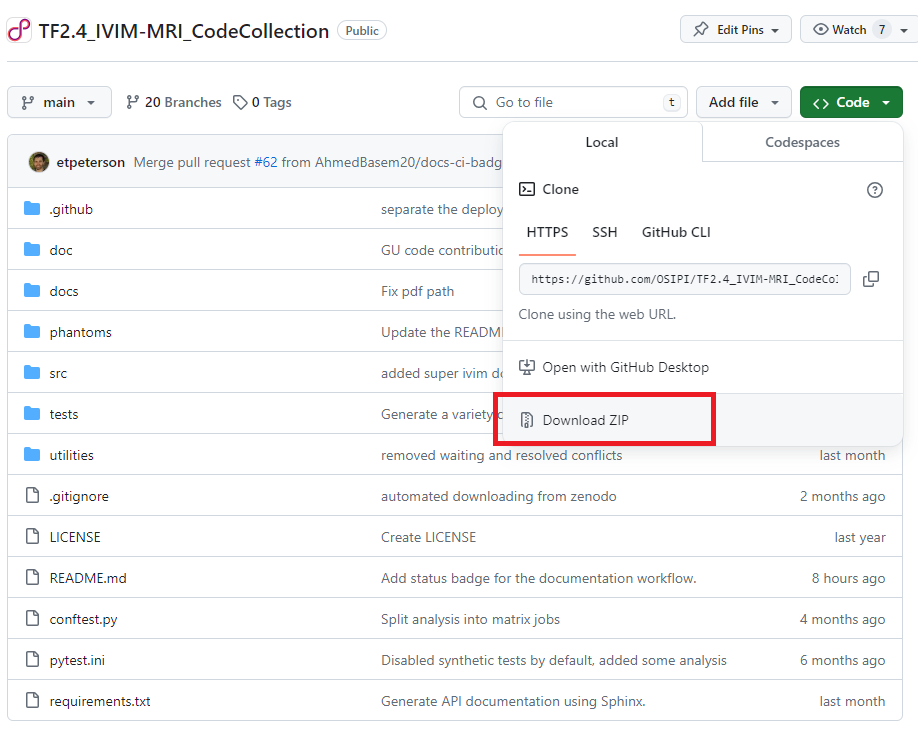

If you haven't done so already, install Anaconda for your pc environment: https://www.anaconda.com/download 

Open Anaconda and install Jupyter Notebook. Once this is installed, you can launch Jupyter Notebook and navigate to this notebook in your local download of the github repository.

## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
sys.path.insert(0, '..')
from utilities.data_simulation.Download_data import download_data
import nibabel

# Loading Data

Due to the large data size, we stored example data elsewhere: https://zenodo.org/records/10696605


In [6]:
# Download the data. 
download_data()

Folder 'download' created.


In [7]:
# Load the data.

# load and init b-values
bvec = np.genfromtxt('../download/Data/brain.bvec')
bval = np.genfromtxt('../download/Data/brain.bval')

#load nifti
data = nibabel.load('../download/Data/brain.nii.gz')
datas = data.get_fdata() 


# Data Preprocessing

First, we need to normalize the data. 


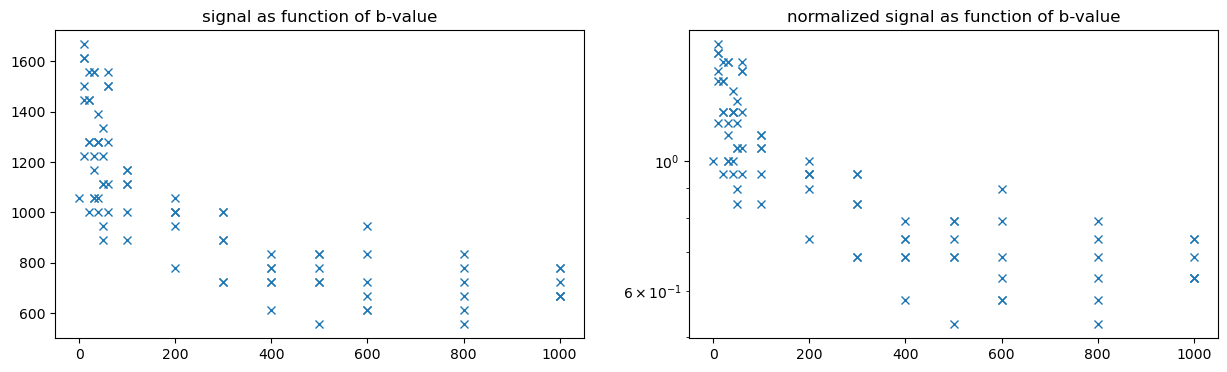

In [118]:
#reshape data for fitting
sx, sy, sz, n_bval = datas.shape 
X_dw = np.reshape(datas, (sx * sy * sz, n_bval))
#select only relevant values, delete background and noise, and normalise data
selsb = np.array(bval) == 0
S0[S0 != S0] = 0
S0=np.squeeze(S0)
S0 = np.nanmean(X_dw[:, selsb], axis=1)
valid_id = (S0 > (0.5 * np.median(S0[S0 > 0]))) 
data = X_dw[valid_id, :]

# Plot example signal as function of b-values without normalization
voxel_nr = 5
fig = plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(bval,data[voxel_nr,:],'x')
plt.title('signal as function of b-value')

# normalise data
S0 = np.nanmean(data[:, selsb], axis=1).astype('<f')
data = data / S0[:, None]


# Plot example signal as function of b-values with normalization
plt.subplot(122)
plt.plot(bval,data[voxel_nr,:],'x')
plt.title('normalized signal as function of b-value')
plt.yscale("log")

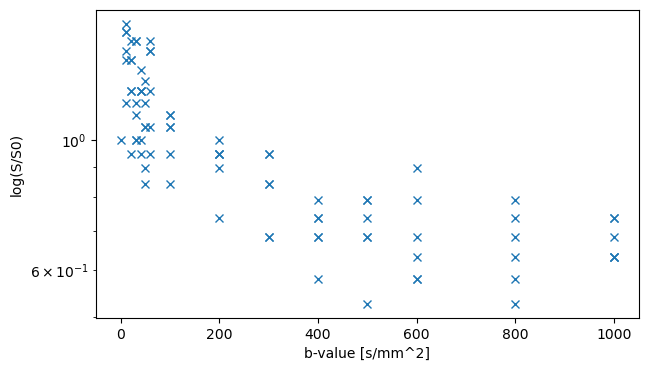

In [119]:
# Plot log(signal) as function of b-values 
fig = plt.figure(figsize=(7, 4))
plt.plot(bval,data[voxel_nr,:],'x')
plt.ylabel('log(S/S0)')
plt.xlabel('b-value [s/mm^2]')
plt.yscale("log")

Text(0.5, 1.0, 'direction 6')

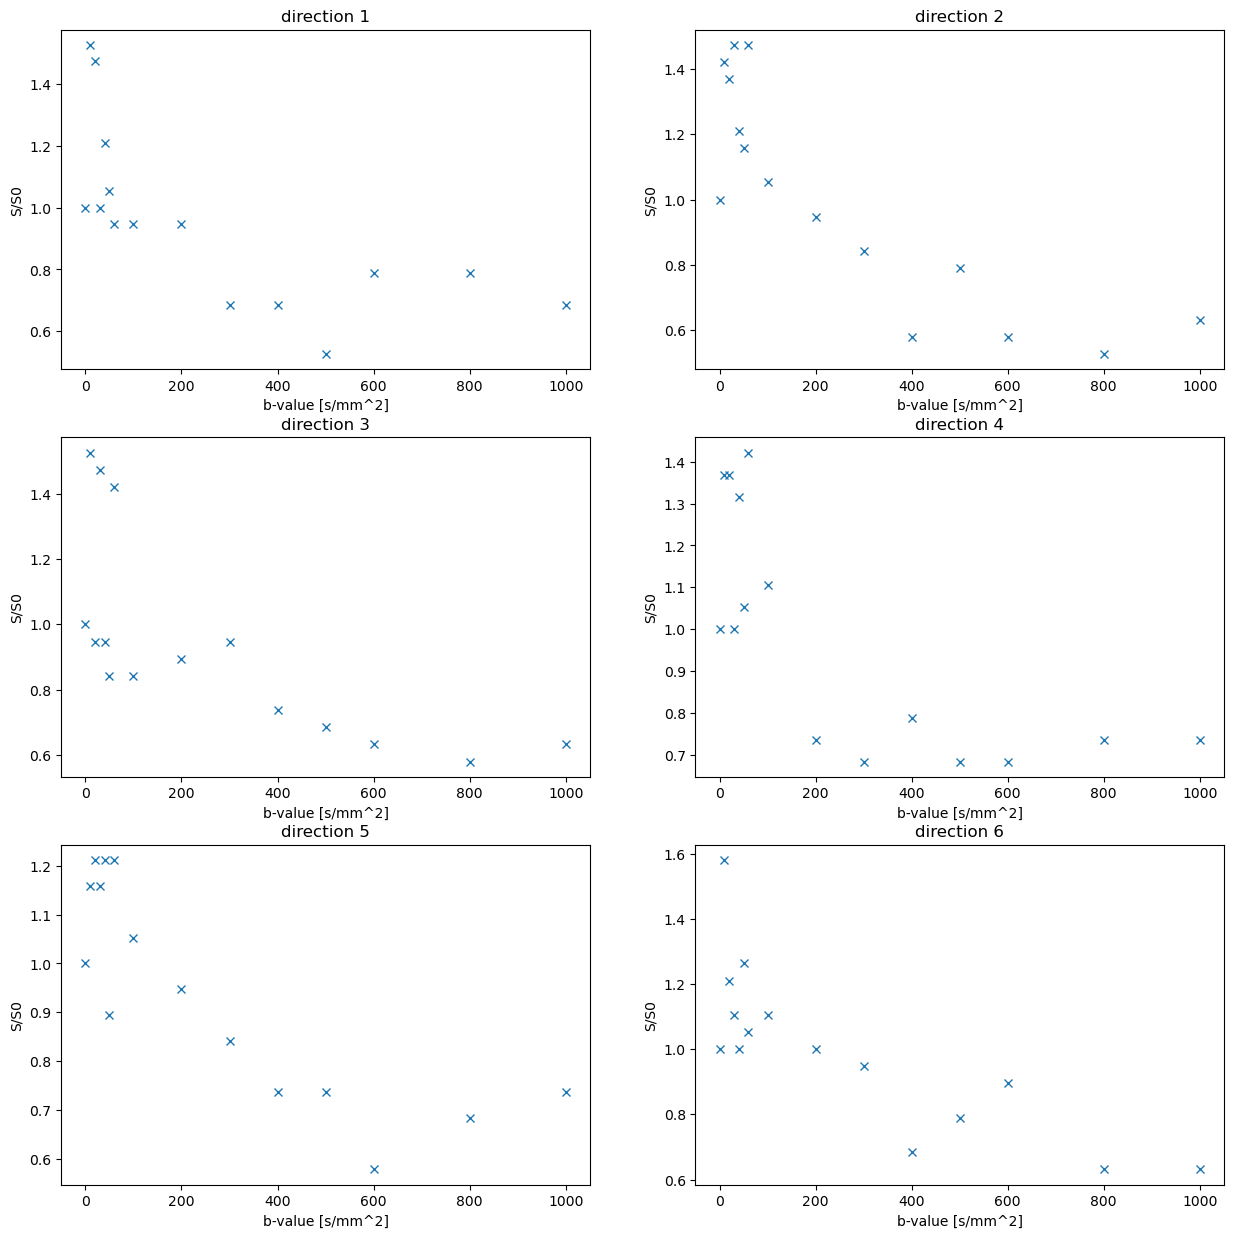

In [145]:
# Plot signal as function of b-values for only 1 direction
fig = plt.figure(figsize=(15, 15))
plt.subplot(321)
direction = 1 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data[voxel_nr,direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, data[voxel_nr,0])
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(322)
direction = 2 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data[voxel_nr,direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, data[voxel_nr,0])
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(323)
direction = 3 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data[voxel_nr,direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, data[voxel_nr,0])
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(324)
direction = 4 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data[voxel_nr,direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, data[voxel_nr,0])
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(325)
direction = 5 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data[voxel_nr,direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, data[voxel_nr,0])
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(326)
direction = 6 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data[voxel_nr,direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, data[voxel_nr,0])
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

# IVIM Analysis: choose an algorithm

In [146]:
from src.wrappers.ivim_fit import ivim_fit





# IVIM Analysis: choose an algorithm


# Visualization
"""
Illustrate how to visualize IVIM parameters:
- Plot IVIM parameter maps (D, D*, perfusion fraction).
- Plot fitted curves along with the original data.
"""
